# Anndata Exploration

In [26]:
# Import packages
import anndata as ad
import json
import pandas as pd
import scanpy as sc
from matplotlib import pyplot as plt

## Read the raw file using `ad.read_h5ad()`

In [27]:
heart = ad.read_h5ad("HT_raw.h5ad")

In [28]:
heart

AnnData object with n_obs × n_vars = 117782 × 60286
    obs: 'uuid', 'hubmap_id', 'age', 'sex', 'height', 'weight', 'bmi', 'cause_of_death', 'race', 'barcode', 'dataset', 'azimuth_label', 'azimuth_id', 'predicted_CLID', 'predicted_label', 'cl_match_type', 'prediction_score'
    var: 'hugo_symbol'
    uns: 'annotation_metadata', 'cell_type_counts', 'creation_date_time', 'datasets', 'uuid'

## Look at the cell by gene matrix. In raw datasets, this will be sparse due to a lot of 0s

In [29]:
heart.X

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 2216316 stored elements and shape (117782, 60286)>

## In this data, the .obs Dataframe shows info about the cells present

In [30]:
heart.obs

,uuid,hubmap_id,age,sex,height,weight,bmi,cause_of_death,race,barcode,dataset,azimuth_label,azimuth_id,predicted_CLID,predicted_label,cl_match_type,prediction_score
cell_id,,,,,,,,,,,,,,,,,
c6bb00096b0cf40751f9d6003fb730c7-AACGCGCAGAAAGCCTACGAAAGTTGCCATAACCTCATTT,c6bb00096b0cf40751f9d6003fb730c7,HBM943.DFKN.947,51,Male,182.9,100.7,NaN,NaN,White,AACGCGCAGAAAGCCTACGAAAGTTGCCATAACCTCATTT,c6bb00096b0cf40751f9d6003fb730c7,Fibroblast,AZ:0000008,CL:0000057,fibroblast,skos:exactMatch,0.841488
c6bb00096b0cf40751f9d6003fb730c7-AACGCGCAGAAAGCCTACGAAAGTTGCCATAACGAGCGT,c6bb00096b0cf40751f9d6003fb730c7,HBM943.DFKN.947,51,Male,182.9,100.7,NaN,NaN,White,AACGCGCAGAAAGCCTACGAAAGTTGCCATAACGAGCGT,c6bb00096b0cf40751f9d6003fb730c7,Ventricular Cardiomycoyte,AZ:0000021,CL:0002131,regular ventricular cardiac myocyte,skos:exactMatch,0.490387
c6bb00096b0cf40751f9d6003fb730c7-AACGCGCAGAAAGCCTACGAAAGTTGCCATAACTTGGATT,c6bb00096b0cf40751f9d6003fb730c7,HBM943.DFKN.947,51,Male,182.9,100.7,NaN,NaN,White,AACGCGCAGAAAGCCTACGAAAGTTGCCATAACTTGGATT,c6bb00096b0cf40751f9d6003fb730c7,Fibroblast,AZ:0000008,CL:0000057,fibroblast,skos:exactMatch,1.000000
c6bb00096b0cf40751f9d6003fb730c7-AACGCGCAGAAAGCCTACGAAAGTTGCCATAAGACCTTAT,c6bb00096b0cf40751f9d6003fb730c7,HBM943.DFKN.947,51,Male,182.9,100.7,NaN,NaN,White,AACGCGCAGAAAGCCTACGAAAGTTGCCATAAGACCTTAT,c6bb00096b0cf40751f9d6003fb730c7,Ventricular Cardiomycoyte,AZ:0000021,CL:0002131,regular ventricular cardiac myocyte,skos:exactMatch,0.491340
c6bb00096b0cf40751f9d6003fb730c7-AACGCGCAGAAAGCCTACGAAAGTTGCCATAAGCAGTATT,c6bb00096b0cf40751f9d6003fb730c7,HBM943.DFKN.947,51,Male,182.9,100.7,NaN,NaN,White,AACGCGCAGAAAGCCTACGAAAGTTGCCATAAGCAGTATT,c6bb00096b0cf40751f9d6003fb730c7,Macrophage,AZ:0000011,CL:0000235,macrophage,skos:exactMatch,0.808582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2d0deacd8be70eefbdc33ac107d97e58-TGATTAGGTATTGAGAGAGTTTATTATGGTATTCAAGCAT,2d0deacd8be70eefbdc33ac107d97e58,HBM296.KZXD.676,25,Female,152.4,54.9,NaN,NaN,White,TGATTAGGTATTGAGAGAGTTTATTATGGTATTCAAGCAT,2d0deacd8be70eefbdc33ac107d97e58,NaN,NaN,NaN,NaN,nan,NaN
2d0deacd8be70eefbdc33ac107d97e58-TGATTAGGTATTGAGAGAGTTTATTATGGTCCATCGTCT,2d0deacd8be70eefbdc33ac107d97e58,HBM296.KZXD.676,25,Female,152.4,54.9,NaN,NaN,White,TGATTAGGTATTGAGAGAGTTTATTATGGTCCATCGTCT,2d0deacd8be70eefbdc33ac107d97e58,NaN,NaN,NaN,NaN,nan,NaN
2d0deacd8be70eefbdc33ac107d97e58-TGATTAGGTATTGAGAGAGTTTATTATGGTCCTGCTACT,2d0deacd8be70eefbdc33ac107d97e58,HBM296.KZXD.676,25,Female,152.4,54.9,NaN,NaN,White,TGATTAGGTATTGAGAGAGTTTATTATGGTCCTGCTACT,2d0deacd8be70eefbdc33ac107d97e58,NaN,NaN,NaN,NaN,nan,NaN


## We can use Pandas to explore the Dataframe further

### Look at the first 10 cell types

In [31]:
heart.obs["predicted_label"].head(10)

cell_id
c6bb00096b0cf40751f9d6003fb730c7-AACGCGCAGAAAGCCTACGAAAGTTGCCATAACCTCATTT                             fibroblast
c6bb00096b0cf40751f9d6003fb730c7-AACGCGCAGAAAGCCTACGAAAGTTGCCATAACGAGCGT     regular ventricular cardiac myocyte
c6bb00096b0cf40751f9d6003fb730c7-AACGCGCAGAAAGCCTACGAAAGTTGCCATAACTTGGATT                             fibroblast
c6bb00096b0cf40751f9d6003fb730c7-AACGCGCAGAAAGCCTACGAAAGTTGCCATAAGACCTTAT    regular ventricular cardiac myocyte
c6bb00096b0cf40751f9d6003fb730c7-AACGCGCAGAAAGCCTACGAAAGTTGCCATAAGCAGTATT                             macrophage
c6bb00096b0cf40751f9d6003fb730c7-AACGCGCAGAAAGCCTACGAAAGTTGCCATAAGTACGTTT                                    NaN
c6bb00096b0cf40751f9d6003fb730c7-AACGCGCAGAAAGCCTACGAAAGTTGCCATAAGTATTGGT                             fibroblast
c6bb00096b0cf40751f9d6003fb730c7-AACGCGCAGAAAGCCTACGAAAGTTGCCATAATACCGAAT                                    NaN
c6bb00096b0cf40751f9d6003fb730c7-AACGCGCAGAAAGCCTACGAAAGTTGCCATACATGGTAAT    regular ven

### How many of each cell type are present?

In [32]:
# value_counts() is a pandas function
heart.obs["predicted_label"].value_counts()

predicted_label
regular ventricular cardiac myocyte     38106
fibroblast                              23853
capillary endothelial cell               2479
B cell                                   1920
myeloid cell                             1897
macrophage                               1833
pericyte                                 1806
mesothelial cell                         1223
natural killer cell                       842
endothelial cell of venule                554
T cell                                    521
smooth muscle cell                        499
endocardial cell                          353
endothelial cell of artery                328
mast cell                                 302
fat cell                                  207
Schwann cell                              204
endothelial cell of lymphatic vessel      186
regular atrial cardiac myocyte             63
endothelial cell                            8
Name: count, dtype: int64

## .var stores gene information in this case

In [33]:
heart.var

,hugo_symbol
ENSG00000000003.15,TSPAN6
ENSG00000000005.6,TNMD
ENSG00000000419.13,DPM1
ENSG00000000457.14,SCYL3
ENSG00000000460.17,C1orf112
...,...
ENSG00000288640.1,NaN
ENSG00000288642.1,CDR1
ENSG00000288643.1,NaN
ENSG00000288644.1,NaN


In [34]:
heart.var["hugo_symbol"].value_counts()

hugo_symbol
Y_RNA          732
Metazoa_SRP    167
U3              50
U6              29
SNORA70         24
              ... 
LAP3P1           1
LAP3P2           1
LAPTM4A          1
LAPTM4A-DT       1
snoZ196          1
Name: count, Length: 38618, dtype: int64

## Read in the processed file to compare

In [35]:
heart_processed = ad.read_h5ad("HT_processed.h5ad")
heart_processed

AnnData object with n_obs × n_vars = 1754 × 15671
    obs: 'uuid', 'hubmap_id', 'age', 'sex', 'height', 'weight', 'bmi', 'cause_of_death', 'race', 'barcode', 'dataset', 'azimuth_label', 'azimuth_id', 'predicted_CLID', 'predicted_label', 'cl_match_type', 'prediction_score', 'n_genes', 'n_counts', 'pca_density', 'gs_sketch', 'leiden'
    var: 'hugo_symbol', 'n_cells', 'mean', 'std'
    uns: 'annotation_metadata', 'cell_type_counts', 'creation_date_time', 'datasets', 'gs_sketch', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'pca_density_params', 'rank_genes_groups', 'rank_genes_groups_cell_types', 'umap', 'uuid'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'unscaled'
    obsp: 'connectivities', 'distances'

## Almost 99% of the cells were filtered in processing, and around 75% of genes were! What does the `.X` matrix look like now?

In [36]:
heart_processed.X

array([[-0.06468012, -0.11154605, -0.07543451, ..., -0.05601254,
        -0.05555734, -0.06008563],
       [-0.06468012, -0.11154605, -0.07543451, ..., -0.05601254,
        -0.05555734, -0.06008563],
       [-0.06468012, -0.11154605, -0.07543451, ..., -0.05601254,
        -0.05555734, -0.06008563],
       ...,
       [-0.06468012, -0.11154605, -0.07543451, ..., -0.05601254,
        -0.05555734, -0.06008563],
       [-0.06468012, -0.11154605, -0.07543451, ..., -0.05601254,
        -0.05555734, -0.06008563],
       [-0.06468012, -0.11154605, -0.07543451, ..., -0.05601254,
        -0.05555734, -0.06008563]], shape=(1754, 15671), dtype=float32)

### Our processing pipeline runs Leiden clustering that we can view with a UMAP.

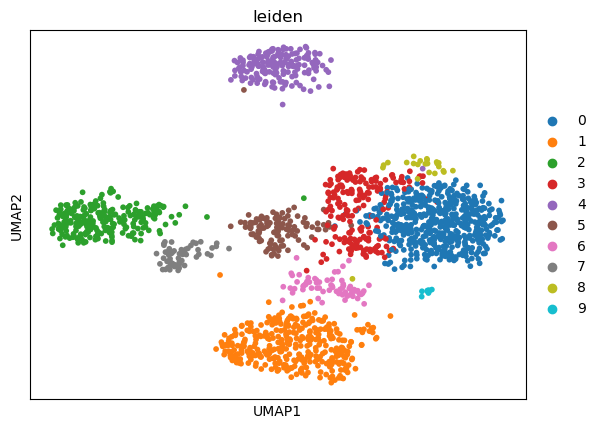

In [37]:
sc.pl.umap(heart_processed, color="leiden")

## Look at the metadata json associated with this data product

### Here, we are using `'r'` as the second arg because we're just reading the file. If we wanted to write a new json file, we could use `'w'`

In [2]:
with open("b20ac19e-04f0-4aa9-b81a-ef667b7f261b.json", 'r') as f:
    metadata = json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'b20ac19e-04f0-4aa9-b81a-ef667b7f261b.json'